### **Context:**
Ridesharing is a service that arranges transportation on short notice. It is a very volatile market and its demand fluctuates wildly with time, place, weather, local events, etc. The key to being successful in this business is to be able to detect patterns in these fluctuations and cater to the demand at any given time.  

### **Objective:**
Uber Technologies, Inc. is an American multinational transportation network company based in San Francisco and has operations in over 785 metropolitan areas with over 110 million users worldwide. As a newly hired Data Scientist in Uber's New York Office, you have been given the task of extracting actionable insights from data that will help in the growth of the the business.

### **Key Questions:**
1. What are the different variables that influence the number of pickups?
2. Which factor affects the number of pickups the most? What could be the possible reasons for that?
3. What are your recommendations to Uber management to capitalize on fluctuating demand?

### **Data Description:**
The data contains the details for the Uber rides across various boroughs (subdivisions) of New York City at an hourly level and attributes associated with weather conditions at that time.

* pickup_dt: Date and time of the pick-up
* borough: NYC's borough
* pickups: Number of pickups for the period (hourly)
* spd: Wind speed in miles/hour
* vsb: Visibility in miles to the nearest tenth
* temp: Temperature in Fahrenheit
* dewp: Dew point in Fahrenheit
* slp: Sea level pressure
* pcp01: 1-hour liquid precipitation
* pcp06: 6-hour liquid precipitation
* pcp24: 24-hour liquid precipitation
* sd: Snow depth in inches
* hday: Being a holiday (Y) or not (N)

### **Importing the necessary libraries**

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### **Loading the dataset**

In [2]:
data = pd.read_csv('Uber_Data.csv')

In [3]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

### **Data Overview**

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

#### **Displaying the first few rows of the dataset**

In [4]:
# looking at head (5 observations)
df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,01-01-2015 01:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,01-01-2015 01:00,Brooklyn,1519,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,01-01-2015 01:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,01-01-2015 01:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,01-01-2015 01:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


- *The `pickup_dt` column contains the date and time of pickup*
- *The `borough` column contains the name of the New York borough in which the pickup was made*
- *The `pickups` column contains the number of pickups in the borough at the given time*
- *Starting from `spd` to `sd`, all the columns are related to weather and  are numerical in nature*
- *The `hday` column indicates whether the day of the pickup is a holiday or not (Y: Holiday, N: Not a holiday)*

#### **Checking the shape of the dataset**

In [5]:
df.shape

(29101, 13)

- *The dataset has 29,101 rows and 13 columns*

####**Checking the data types of the columns for the dataset**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       28742 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


- *All the columns have 29,101 observations except `borough` and `temp` which has 26058 and 28742 observations indicating that there are some missing values in them*
- *The `pickup_dt` column is being read as a 'object' data type but it should be in date-time format*
- *The `borough` and `hday` columns are of object type while the rest of the columns are numerical in nature*
- *The object type columns contain categories in them*

#### **Getting the statistical summary for the dataset**

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pickups,29101.0,490.215903,995.649536,0.0,1.0,54.0,449.000000,7883.00
spd,29101.0,5.984924,3.699007,0.0,3.0,6.0,8.000000,21.00
vsb,29101.0,8.818125,2.442897,0.0,9.1,10.0,10.000000,10.00
temp,28742.0,47.900019,19.798783,2.0,32.0,46.5,65.000000,89.00
dewp,29101.0,30.823065,21.283444,-16.0,14.0,30.0,50.000000,73.00
slp,29101.0,1017.817938,7.768796,991.4,1012.5,1018.2,1022.900000,1043.40
pcp01,29101.0,0.003830,0.018933,0.0,0.0,0.0,0.000000,0.28
pcp06,29101.0,0.026129,0.093125,0.0,0.0,0.0,0.000000,1.24
pcp24,29101.0,0.090464,0.219402,0.0,0.0,0.0,0.050000,2.10
sd,29101.0,2.529169,4.520325,0.0,0.0,0.0,2.958333,19.00


- *There is a huge difference between the 3rd quartile and the maximum value for the number of pickups (`pickups`) and snow depth (`sd`) indicating that there might be outliers to the right in these variables*
- *The temperature has a wide range indicating that data consists of entries for different seasons*

**Let's check the count of each unique category in each of the categorical/object type variables.**

In [8]:
df['borough'].unique()

array(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island',
 nan], dtype=object)

- *We can observe that there are 6 unique boroughs present in the dataset for New York*

In [9]:
df['hday'].value_counts(normalize=True)

N 0.961479
Y 0.038521
Name: hday, dtype: float64

- *The number of non-holiday observations is much more than holiday observations which make sense*
-*Around 96% of the observations are from non-holidays*

We have observed earlier that the data type for `pickup_dt` is object in nature. Let us change the data type of `pickup_dt` to date-time format.

#### **Fixing the datatypes**

In [10]:
df['pickup_dt'] = pd.to_datetime(df['pickup_dt'], format="%d-%m-%Y %H:%M")

Let's check the data types of the columns again to ensure that the change has been executed properly.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   pickup_dt  29101 non-null  datetime64[ns]
 1   borough    26058 non-null  object        
 2   pickups    29101 non-null  int64         
 3   spd        29101 non-null  float64       
 4   vsb        29101 non-null  float64       
 5   temp       28742 non-null  float64       
 6   dewp       29101 non-null  float64       
 7   slp        29101 non-null  float64       
 8   pcp01      29101 non-null  float64       
 9   pcp06      29101 non-null  float64       
 10  pcp24      29101 non-null  float64       
 11  sd         29101 non-null  float64       
 12  hday       29101 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 2.9+ MB


- *The data type of the `pickup_dt` column has been succesfully changed to date-time format*
- *There are now 10 numerical columns, 2 object type columns and 1 date-time column*

Now let's check the range of time period for which the data has been collected.

In [12]:
df['pickup_dt'].min() # this will display the date from which data observations have been started

Timestamp('2015-01-01 01:00:00')

In [13]:
df['pickup_dt'].max() # this will display the last date of the dataset

Timestamp('2015-06-30 23:00:00')

- *So the time period for the data is from Janunary to June for the year 2015*
- *There is a significant difference in the weather conditions in this period which we have observed from our statistical summary for various weather parameters such as temperature ranging from 2F to 89F*

Since the `pickup_dt` column contains the combined information in the form of date, month, year and time of the day, let's extract each piece of information as a separate entity to get the trend of rides varying over time.

#### **Extracting date parts from pickup date**

In [14]:
# Extracting date parts from pickup date
df['start_year'] = df.pickup_dt.dt.year # extracting the year from the date
df['start_month'] = df.pickup_dt.dt.month_name() # extracting the month name from the date
df['start_hour'] = df.pickup_dt.dt.hour # extracting the hour from the time
df['start_day'] = df.pickup_dt.dt.day # extracting the day from the date
df['week_day'] = df.pickup_dt.dt.day_name() # extracting the day of the week from the date

Now we can remove the `pickup_dt` column from our dataset as it will not be required for further analysis.

In [15]:
# removing the pickup date column
df.drop('pickup_dt',axis=1,inplace=True)

**Let's check the first few rows of the dataset to see if changes have been applied properly**

In [16]:
df.head()

,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,start_year,start_month,start_hour,start_day,week_day
0,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
1,Brooklyn,1519,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
2,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
3,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
4,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday


**We can see the changes have been applied to the dataset properly.**

Let's analyze the statistical summary for the new columns added in the dataset.

In [17]:
df.describe(include='all').T
# setting include='all' will get the statistical summary for both the numerical and categorical variables.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
borough,26058,6,Bronx,4343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickups,29101.0,NaN,NaN,NaN,490.215903,995.649536,0.0,1.0,54.0,449.0,7883.0
spd,29101.0,NaN,NaN,NaN,5.984924,3.699007,0.0,3.0,6.0,8.0,21.0
vsb,29101.0,NaN,NaN,NaN,8.818125,2.442897,0.0,9.1,10.0,10.0,10.0
temp,28742.0,NaN,NaN,NaN,47.900019,19.798783,2.0,32.0,46.5,65.0,89.0
dewp,29101.0,NaN,NaN,NaN,30.823065,21.283444,-16.0,14.0,30.0,50.0,73.0
slp,29101.0,NaN,NaN,NaN,1017.817938,7.768796,991.4,1012.5,1018.2,1022.9,1043.4
pcp01,29101.0,NaN,NaN,NaN,0.00383,0.018933,0.0,0.0,0.0,0.0,0.28
pcp06,29101.0,NaN,NaN,NaN,0.026129,0.093125,0.0,0.0,0.0,0.0,1.24
pcp24,29101.0,NaN,NaN,NaN,0.090464,0.219402,0.0,0.0,0.0,0.05,2.1


- *The collected data is from the year 2015*
- *It consists of data for 6 unique months*

**We have earlier seen that the `borough` and `temp` columns have missing values in them. So let us see them in detail before moving on to do our EDA.**

### **Missing value treatment**

One of the commonly used method to deal with the missing values is to impute them with the central tendencies - mean, median, and mode of a column.

* `Replacing with mean`: In this method the missing values are imputed with the mean of the column. Mean gets impacted by the presence of outliers, and in such cases where the column has outliers using this method may lead to erroneous imputations.

* `Replacing with median`: In this method the missing values are imputed with the median of the column. In cases where the column has outliers, median is an appropriate measure of central tendency to deal with the missing values over mean.

* `Replacing with mode`: In this method the missing values are imputed with the mode of the column. This method is generally preferred with categorical data.

Let's check how many missing values are present in each variable.

In [18]:
# checking missing values across each columns
df.isnull().sum()

borough 3043
pickups 0
spd 0
vsb 0
temp 359
dewp 0
slp 0
pcp01 0
pcp06 0
pcp24 0
sd 0
hday 0
start_year 0
start_month 0
start_hour 0
start_day 0
week_day 0
dtype: int64

- *The variable `borough` and `temp ` have 3043 and 359 missing values in them*
- *There are no missing values in other variables*

Let us first see the missing value of the `borough` column in detail.

In [19]:
# Checking the missing values further
df.borough.value_counts(normalize=True, dropna=False)

Bronx 0.149239
Brooklyn 0.149239
EWR 0.149239
Manhattan 0.149239
Queens 0.149239
Staten Island 0.149239
NaN 0.104567
Name: borough, dtype: float64

- *All the 6 categories have the same percentage i.e. ~15%. There is no mode (or multiple modes) for this variable*
- *The percentage of missing values is close to the percentage of observations from other boroughs*
- *We can treat the missing values as a separate category for this variable*

We can replace the null values present in the `borough` column with a new label as `Unknown`.

In [20]:
# Replacing NaN with Unknown
df['borough'].fillna('Unknown', inplace =True)

In [21]:
df['borough'].unique()

array(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island',
 'Unknown'], dtype=object)

*It can be observed that the new label `Unknown` has been added in the `borough` column*

In [22]:
df.isnull().sum()

borough 0
pickups 0
spd 0
vsb 0
temp 359
dewp 0
slp 0
pcp01 0
pcp06 0
pcp24 0
sd 0
hday 0
start_year 0
start_month 0
start_hour 0
start_day 0
week_day 0
dtype: int64

The missing values in the `borough` column have been treated. Let us now move on to `temp` variable and see how to deal with the missing values present there.

Since this is a numerical variable, so we can impute the missing values by mean or median but before imputation, let's analyze the `temp` variable in detail.

Let us print the rows where the `temp` variable is having missing values.

In [23]:
df.loc[df['temp'].isnull()==True]

,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,start_year,start_month,start_hour,start_day,week_day
1,Brooklyn,1519,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
8,Brooklyn,1229,3.0,10.0,NaN,6.0,1023.0,0.0,0.0,0.0,0.0,Y,2015,January,2,1,Thursday
15,Brooklyn,1601,5.0,10.0,NaN,8.0,1022.3,0.0,0.0,0.0,0.0,Y,2015,January,3,1,Thursday
22,Brooklyn,1390,5.0,10.0,NaN,9.0,1022.0,0.0,0.0,0.0,0.0,Y,2015,January,4,1,Thursday
29,Brooklyn,759,5.0,10.0,NaN,9.0,1021.8,0.0,0.0,0.0,0.0,Y,2015,January,5,1,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,Brooklyn,594,5.0,10.0,NaN,13.0,1016.2,0.0,0.0,0.0,0.0,N,2015,January,19,15,Thursday
2340,Brooklyn,620,5.0,10.0,NaN,13.0,1015.5,0.0,0.0,0.0,0.0,N,2015,January,20,15,Thursday
2347,Brooklyn,607,3.0,10.0,NaN,14.0,1015.4,0.0,0.0,0.0,0.0,N,2015,January,21,15,Thursday
2354,Brooklyn,648,9.0,10.0,NaN,14.0,1015.4,0.0,0.0,0.0,0.0,N,2015,January,22,15,Thursday


*There are 359 observations where `temp` variable has missing values. From the overview of the dataset, it seems as if the missing temperature values are from the Brooklyn borough in the month of January.*

So let's confirm our hypothesis by printing the unique boroughs and month names present for these missing values.

In [24]:
df.loc[df['temp'].isnull()==True,'borough'].value_counts()

Brooklyn 359
Name: borough, dtype: int64

In [25]:
df.loc[df['temp'].isnull()==True,'start_month'].value_counts()

January 359
Name: start_month, dtype: int64

*The missing values in `temp` are from the Brooklyn borough and they are from the month of January.*

Let's check on which the date for the month of  January, missing values are present.

In [26]:
df.loc[df['temp'].isnull()==True,'start_day'].unique() # days for which missing values are present

array([ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

In [27]:
df.loc[df['start_month']=='January', 'start_day'].unique() # unique days in the month of January

array([ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

*It can be observed  that out of the 31 days in January, the data is missing for the first 15 days.*

Since from the statistical summary, the mean and median values of temperature are close to each other, hence we can impute the missing values in the `temp` column by taking the mean tempertaure of the Brooklyn borough during 16th to 31st January.

We will use fillna() function to impute the missing values.

**fillna() -** The fillna() function is used to fill NaN values by using the provided input value.

       Syntax of fillna():  data['column'].fillna(value = x)

In [28]:
df['temp'] = df['temp'].fillna(value=df.loc[df['borough'] == 'Brooklyn','temp'].mean())

In [29]:
df.isnull().sum()

borough 0
pickups 0
spd 0
vsb 0
temp 0
dewp 0
slp 0
pcp01 0
pcp06 0
pcp24 0
sd 0
hday 0
start_year 0
start_month 0
start_hour 0
start_day 0
week_day 0
dtype: int64

- *All the missing values have been imputed and there are no missing values in our dataset now*.

Let's now perform the Exploratory Data Analysis on the dataset

### **Exploratory Data Analysis**

### **Univariate Analysis**

**Let us first explore the numerical variables.**

Univariate data visualization plots help us comprehend the descriptive summary of the particular data variable. These plots help in understanding the location/position of observations in the data variable, its distribution, and dispersion.

We can check the distribution of observations by plotting **Histograms** and **Boxplots**

A histogram takes as input a numeric variable only. The variable is cut into several bins, and the number of observations per bin is represented by the height of the bar

![Screenshot 2022-02-26 145921.jpg](attachment:./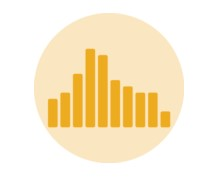)


A boxplot gives a summary of one or several numeric variables. The line that divides the box into 2 parts represents the median of the data. The end of the box shows the upper and lower quartiles. The extreme lines show the highest and lowest value excluding outliers.

![Screenshot 2022-02-26 150041.jpg](attachment:./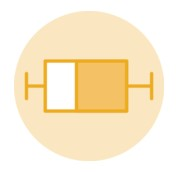)

#### **Observations on Pickups**

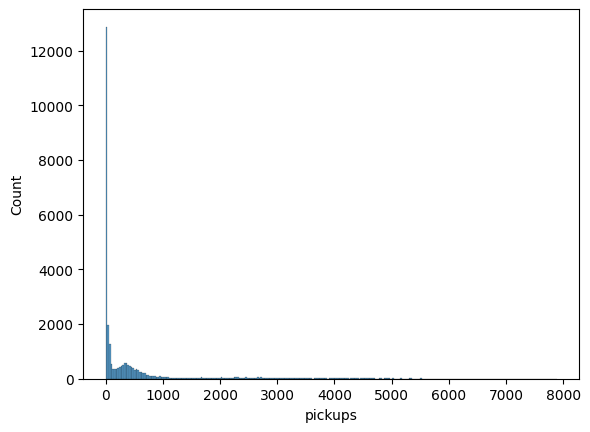

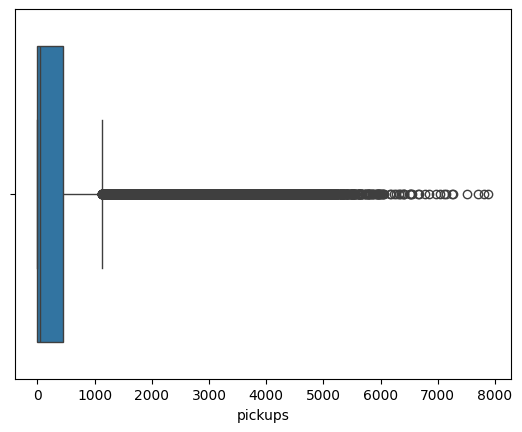

In [30]:
sns.histplot(data=df,x='pickups')
plt.show()
sns.boxplot(data=df,x='pickups')
plt.show()

- *The distribution of pickups is highly right skewed*
- *There are a lot of outliers in this variable*
- *While mostly the number of pickups are at a lower end, we have observations where the number of pickups went as high as 8000*

####  **Observations on Visibility**

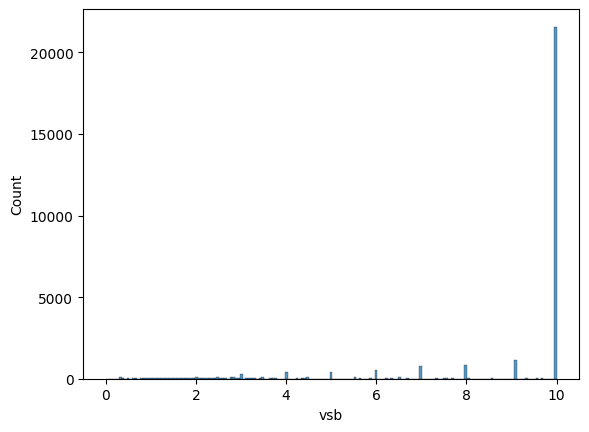

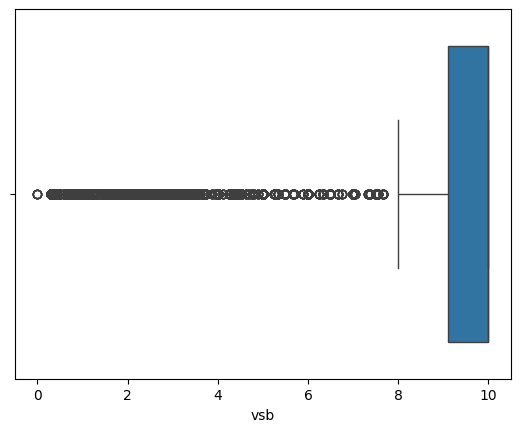

In [31]:
sns.histplot(data=df,x='vsb')
plt.show()
sns.boxplot(data=df,x='vsb')
plt.show()

- *The `visibility` column is is left-skewed*
- *Both the mean and median are high, indicating that the visibility is good on most days*
- *There are, however, outliers towards the left, indicating that visibility is extremely low on some days*
- *It will be interesting to see how visibility affects the Uber pickup frequency*

#### **Observations on Temperature**

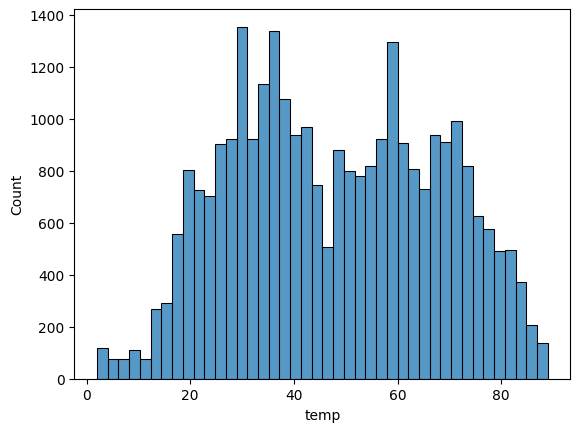

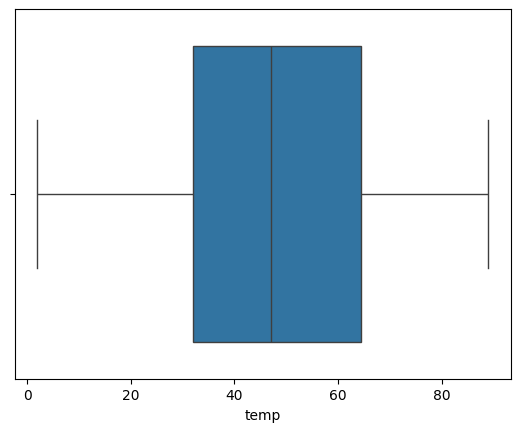

In [32]:
sns.histplot(data=df,x='temp')
plt.show()
sns.boxplot(data=df,x='temp')
plt.show()

- *Temperature does not have any outliers*
- *50% of the temperature values are less than 45F (~7 degree celcius), indicating cold weather conditions*

#### **Observations on Dew point**

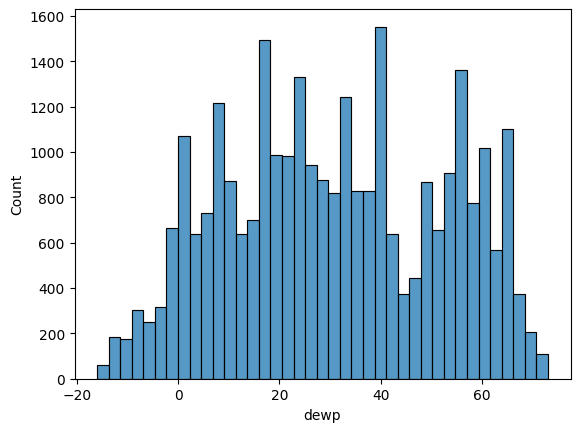

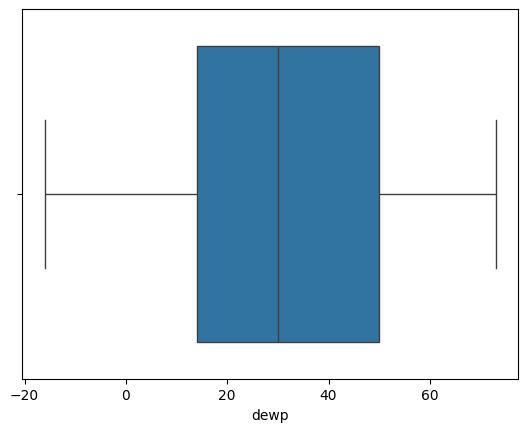

In [33]:
sns.histplot(data=df,x='dewp')
plt.show()
sns.boxplot(data=df,x='dewp')
plt.show()

- *There are no outliers for dew point either*
- *The distribution is similar to that of temperature. It suggests possible correlation between the two variables*
- *Dew point is an indication of humidity, which is correlated with temperature*

#### **Observations on Sea level pressure**

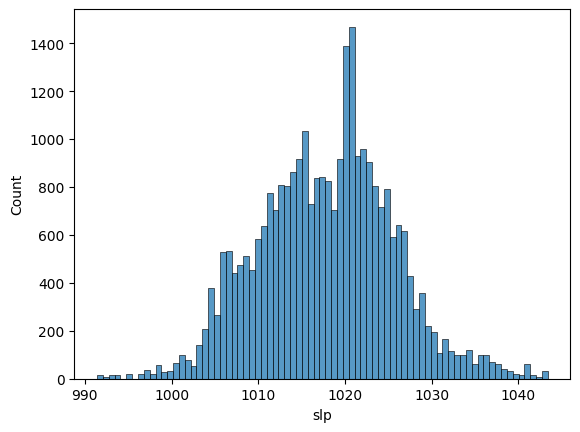

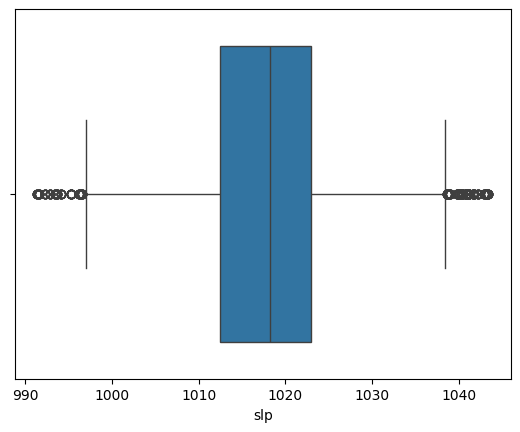

In [34]:
sns.histplot(data=df,x='slp')
plt.show()
sns.boxplot(data=df,x='slp')
plt.show()

- *Sea level pressure distribution is close to normal*
- *There are a few outliers on both the ends*

####  **Observations on Liquid Precipitation (Rain)**

**1 hour liquid precipitation**

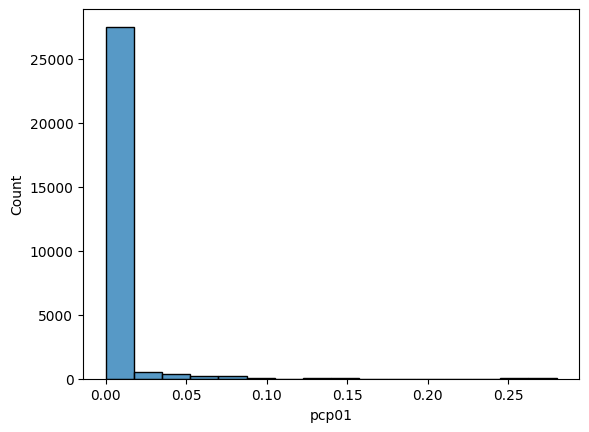

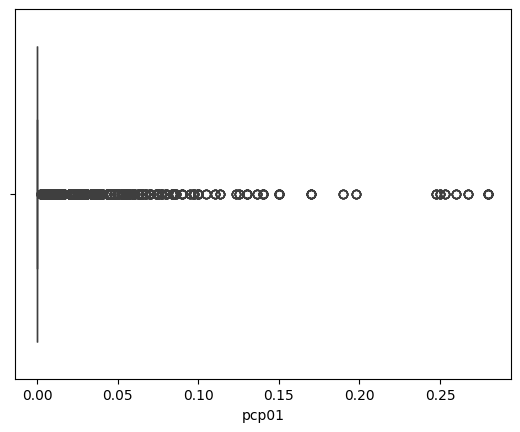

In [35]:
sns.histplot(data=df,x='pcp01')
plt.show()
sns.boxplot(data=df,x='pcp01')
plt.show()

**6 hour liquid precipitation**

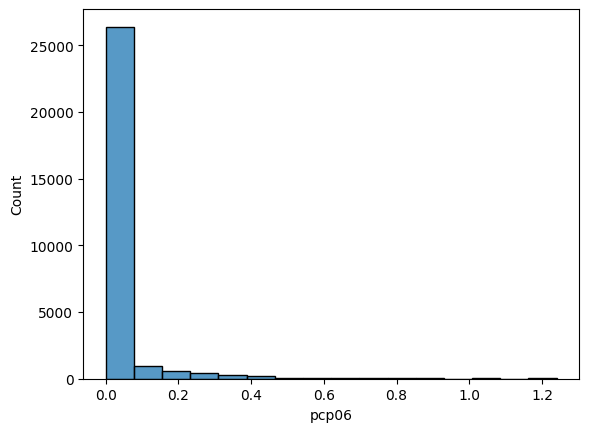

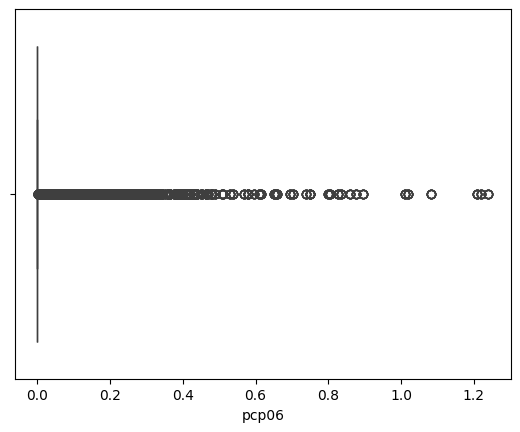

In [36]:
sns.histplot(data=df,x='pcp06')
plt.show()
sns.boxplot(data=df,x='pcp06')
plt.show()

**24 hour liquid precipitation**

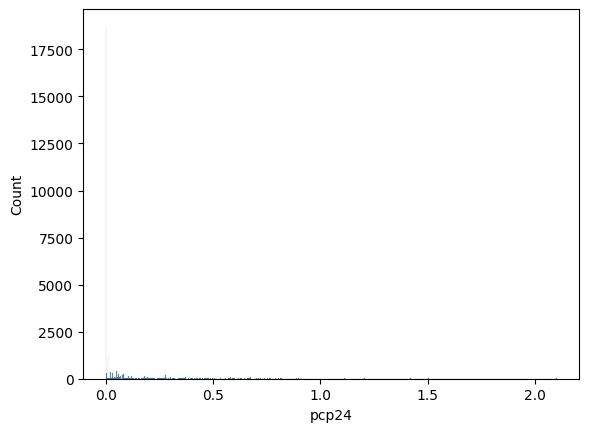

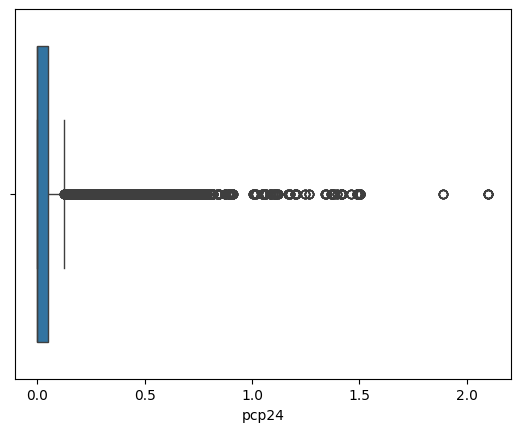

In [37]:
sns.histplot(data=df,x='pcp24')
plt.show()
sns.boxplot(data=df,x='pcp24')
plt.show()

- *It rains on relatively fewer days in New York*
- *Most of the days are dry*
- *The outliers occur when it rains heavily*

#### **Observations on Snow Depth**

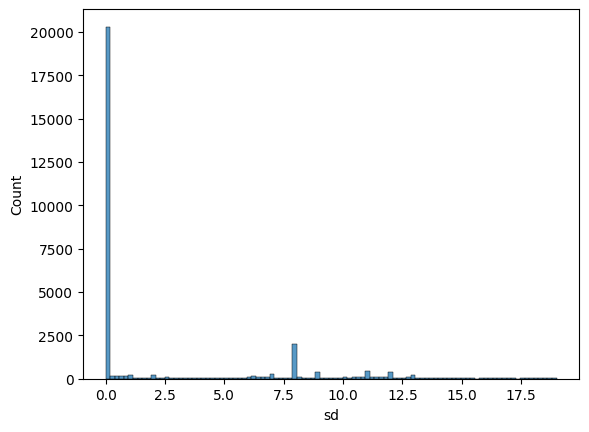

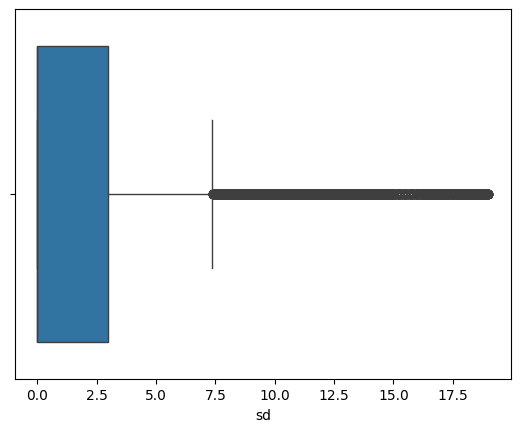

In [38]:
sns.histplot(data=df,x='sd')
plt.show()
sns.boxplot(data=df,x='sd')
plt.show()

- *We can observe that there is snowfall in the time period that we are analyzing*
- *There are outliers in this data*
- *We will have to see how snowfall affects pickups. We know that very few people are likely to get out if it is snowing heavily, so our pickups is most likely to decrease when it snows*

**Let's explore the categorical variables now**

Bar Charts can be used to explore the distribution of Categorical Variables. Each entity of the categorical variable is represented as a bar. The size of the bar represents its numeric value.


![Screenshot 2022-02-26 150512.jpg](attachment:./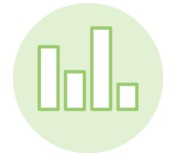)

#### **Observations on holiday**

<Axes: xlabel='hday', ylabel='count'>

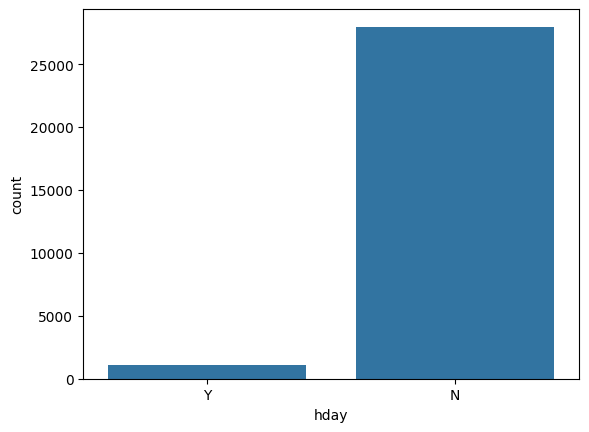

In [39]:
sns.countplot(data=df,x='hday')

- *The number of pickups is more on non-holidays than on holidays*

#### **Observations on borough**

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Bronx'),
  Text(1, 0, 'Brooklyn'),
  Text(2, 0, 'EWR'),
  Text(3, 0, 'Manhattan'),
  Text(4, 0, 'Queens'),
  Text(5, 0, 'Staten Island'),
  Text(6, 0, 'Unknown')])

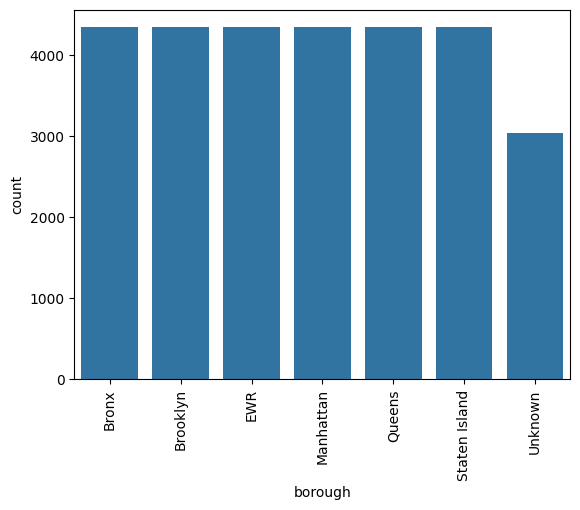

In [40]:
sns.countplot(data=df,x='borough')
plt.xticks(rotation = 90)

- *The observations are uniformly distributed across the boroughs except the observations that had NaN values and were attributed to Unknown borough*

### **Bivariate Analysis**

Bi means two and variate means variable, so here there are two variables. The analysis is related to the relationship between the two variables.

Different types of Bivariate Analysis that can be done:
- Bivariate Analysis of two Numerical Variables
- Bivariate Analysis of two Categorical Variables
- Bivariate Analysis of one Numerical Variables and one Categorical Variable

**Let us plot bivariate charts between variables to understand their interaction with each other.**

#### **Correlation by Heatmap**


A **heatmap** is a graphical representation of data as a color-encoded matrix. It is a great way of representing  the correlation for each pair of columns in the data.The *heatmap()* function of seaborn helps us to create such a plot

![Screenshot 2022-02-26 153546.jpg](attachment:./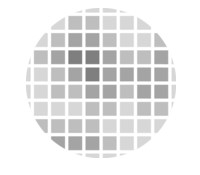)

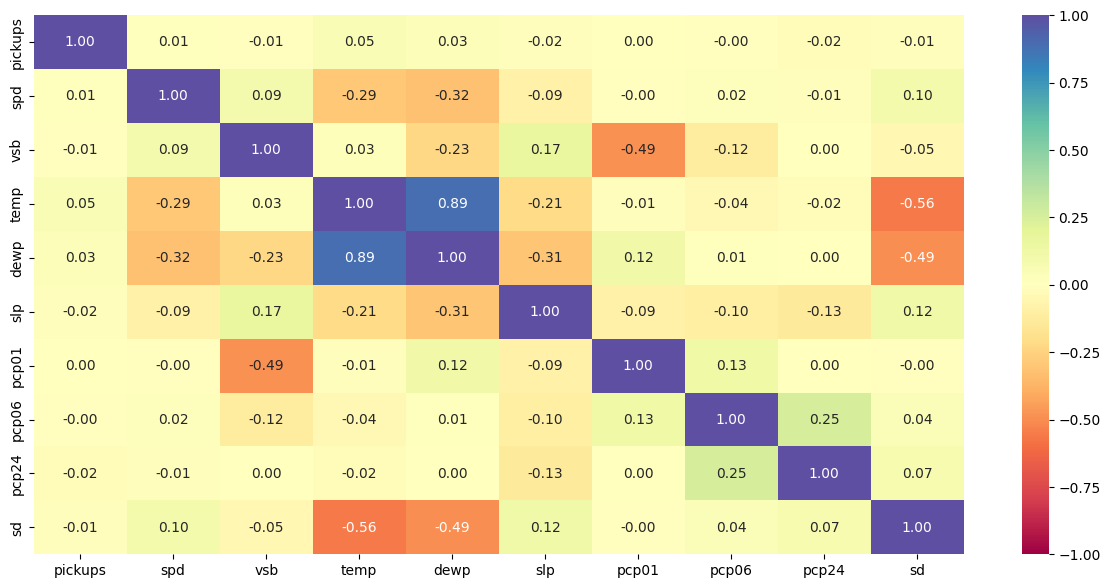

In [41]:
# Check for correlation among numerical variables
num_var = ['pickups','spd','vsb','temp','dewp', 'slp','pcp01', 'pcp06', 'pcp24', 'sd']

corr = df[num_var].corr()

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- *As expected, temperature shows high correlation with dew point*
- *Visibility is negatively correlated with precipitation. If it is raining heavily, then the visibility will be low. This is aligned with our intuitive understanding*
* *Snow depth of course would be negatively correlated with temperature.*
* *Wind speed and sea level pressure are negatively correlated with temperature*
* *It is important to note that correlation does not imply causation*
* *There does not seem to be a strong relationship between number of pickups and weather stats*

#### **Bivariate Scatter Plots**

A **scatterplot** displays the relationship between 2 numeric variables. For each data point, the value of its first variable is represented on the X axis, the second on the Y axis

![Screenshot 2022-02-26 153458.jpg](attachment:./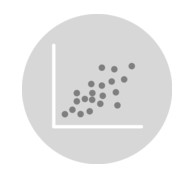)

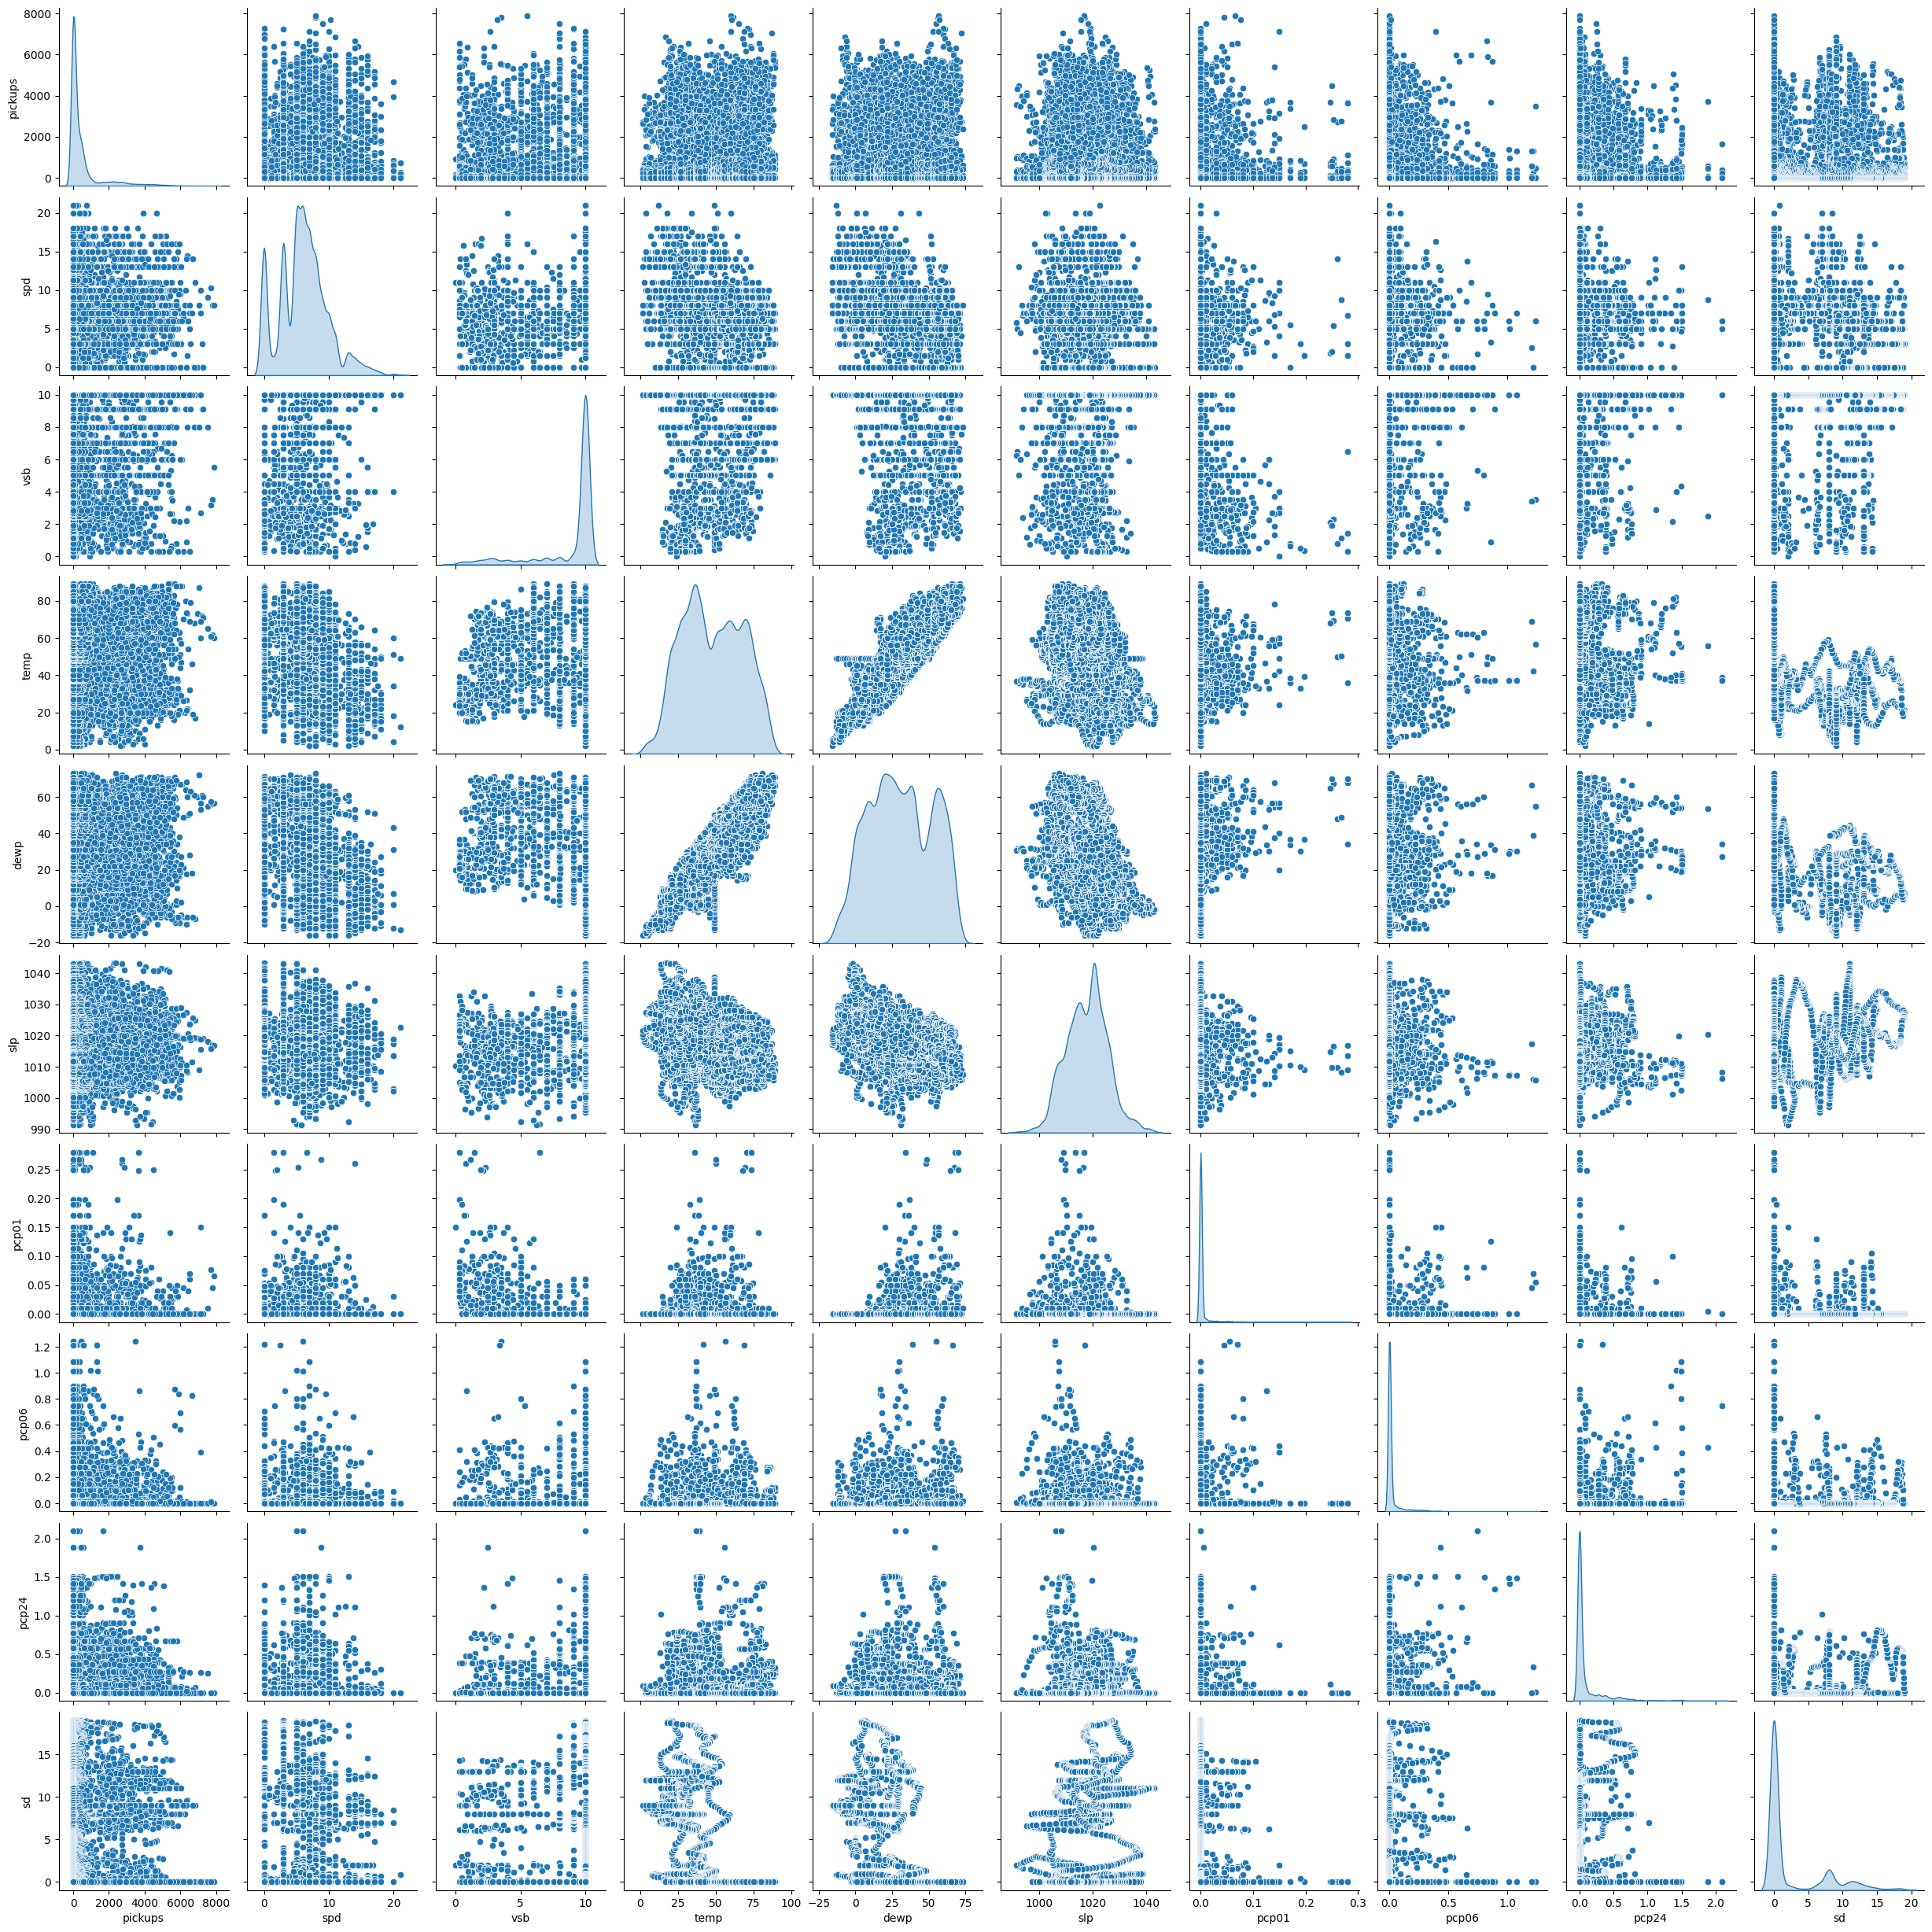

In [42]:
sns.pairplot(data=df[num_var], diag_kind="kde")
plt.show()

- *We get the same insights as from the correlation plot*
- *There does not seem to be a strong relationship between number of pickups and weather stats*

#### Now let's check the trend between pickups across different time based variables

We can check the trends for time measures by plotting Line charts

A **line chart** is often used to visualize a trend in data over intervals of time, thus the line is often drawn chronologically.

![Screenshot 2022-02-26 153349.jpg](attachment:./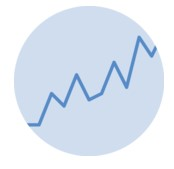)

#### **Pickups across months**

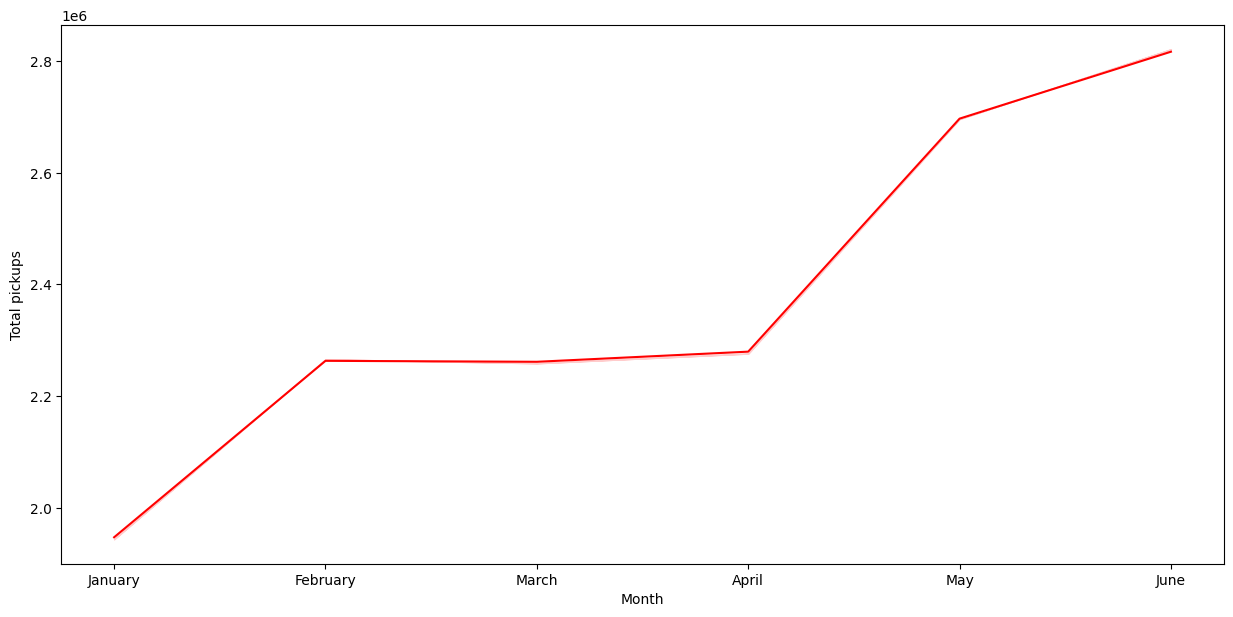

In [56]:
cats = df.start_month.unique().tolist()
df.start_month = pd.Categorical(df.start_month, ordered=True, categories=cats)

plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="start_month", y="pickups",errorbar=('ci', False), color="red", estimator='sum')
plt.ylabel('Total pickups')
plt.xlabel('Month')
plt.show()

- *There is a clear increasing trend in monthly bookings*
- *The number of pickups in June is almost 2.8 times of that of January*

#### **Pickups vs Days of the Month**

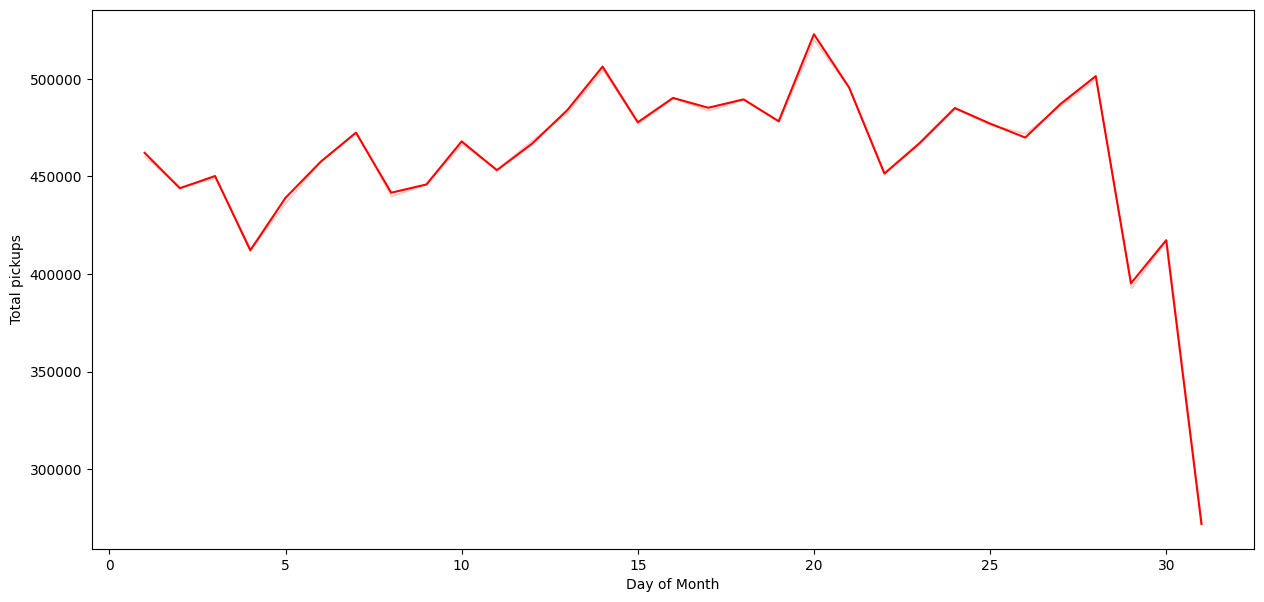

In [57]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="start_day", y="pickups", estimator='sum', errorbar=('ci', False), color="red")
plt.ylabel('Total pickups')
plt.xlabel('Day of Month')
plt.show()

- *There is a steep fall in the number of pickups over the last days of the month*
- *This can partially be attributed to month of Feb having just 28 days. We can drop Feb and have a look at this chart again*
- *There is a peak in the bookings around the 20th day of the month*

**Let us drop the observations for the month of Feb and see the trend**

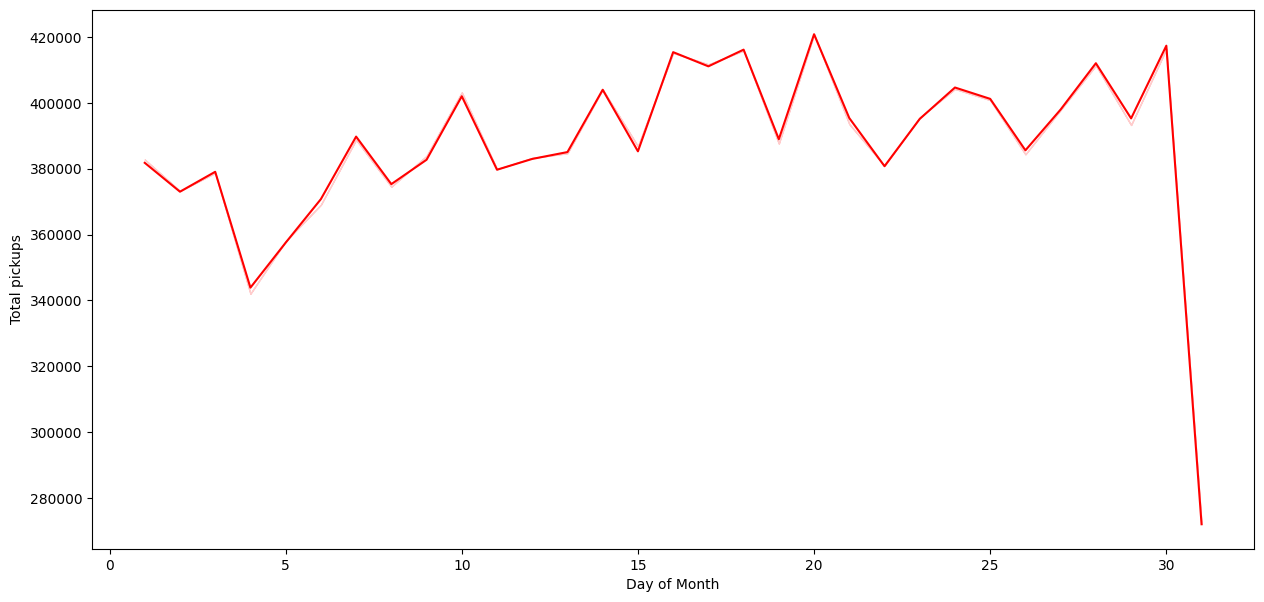

In [58]:
# Let us drop the Feb month and see the trend
df_not_feb =  df[df['start_month'] != 'February']
plt.figure(figsize=(15,7))
sns.lineplot(data=df_not_feb, x="start_day", y="pickups", estimator='sum', errorbar=('ci', False), color="red")
plt.ylabel('Total pickups')
plt.xlabel('Day of Month')
plt.show()

- *Number of pickups for 31st is still low because not all months have the 31st day*

#### **Pickups across Hours of the Day**

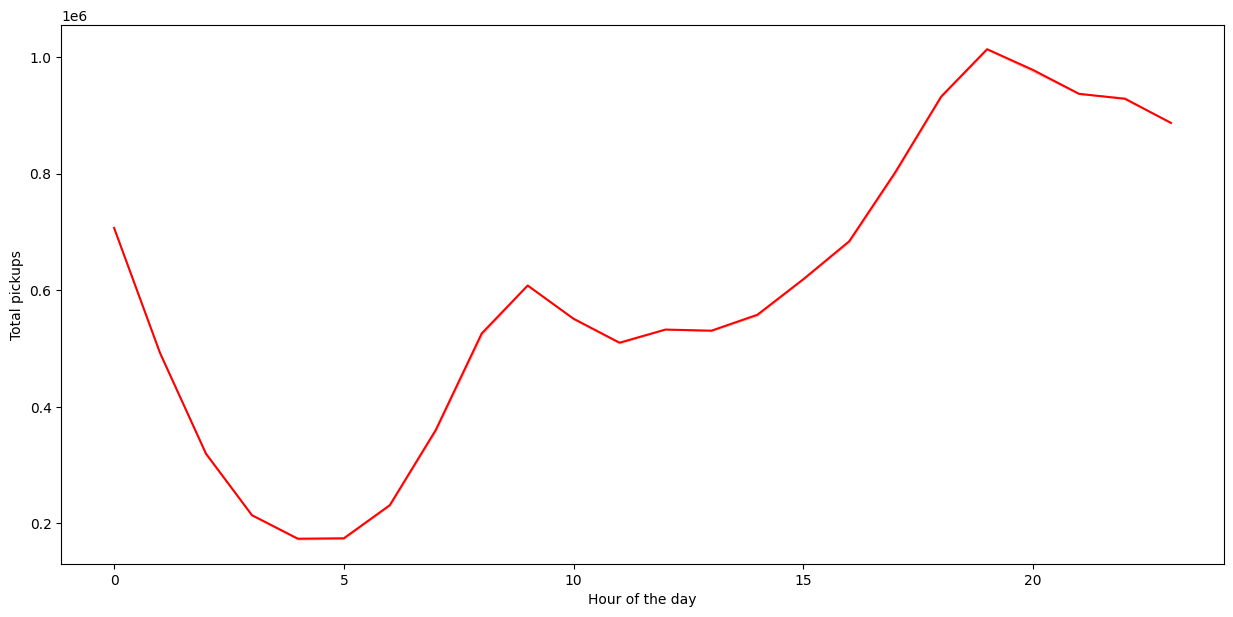

In [55]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="start_hour", y="pickups", estimator='sum', errorbar=('ci', False), color="red")
plt.ylabel('Total pickups')
plt.xlabel('Hour of the day')
plt.show()

- *Bookings peak around the 19th and 20th hour of the day*
- *The peak can be attributed to the time when people leave their workplaces*
- *From 5 AM onwards, we can see an increasing trend till 10, possibly the office rush*
- *Pickups then go down from 10AM to 12PM post which they start increasing*

#### **Pickups across Weekdays**

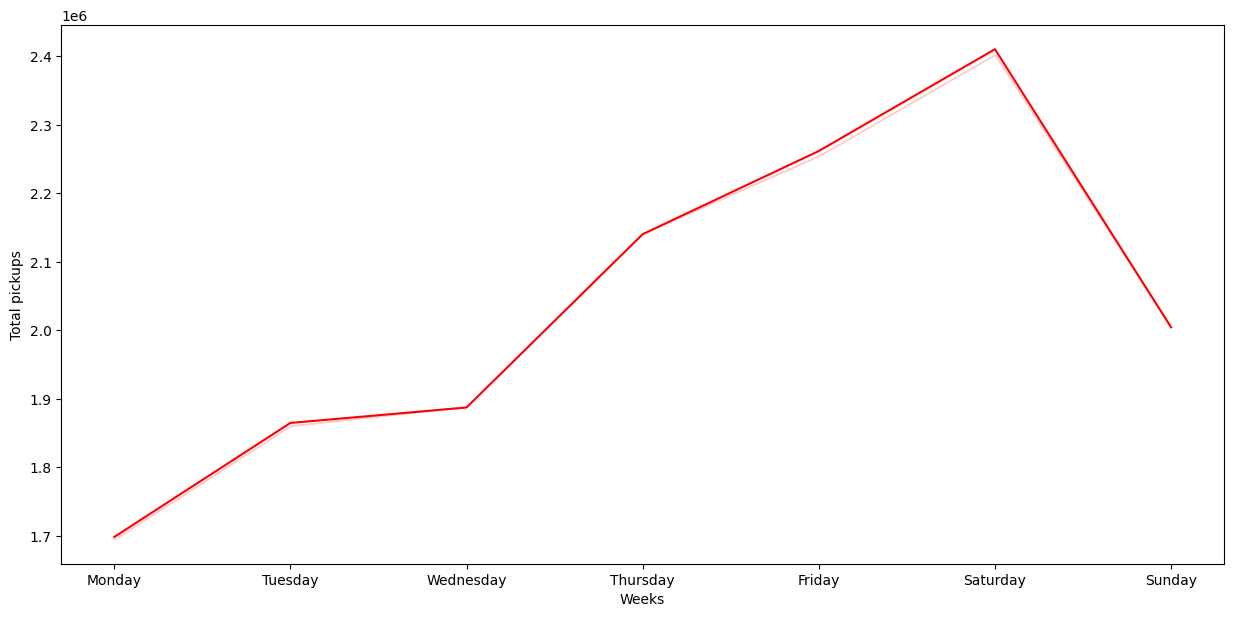

In [59]:
cats = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
df.week_day = pd.Categorical(df.week_day, ordered=True, categories=cats)

plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="week_day", y="pickups", errorbar=('ci', False), color="red", estimator='sum')
plt.ylabel('Total pickups')
plt.xlabel('Weeks')
plt.show()

- *Pickups gradually increase as the week progresses and starts dropping down after Saturday*
- *We need to do more investigation to understand why demand for Uber is low in the beginning of the week*

**Let's check if there is any significant effect of the categorical variables on the number of pickups**

#### **Pickups across Borough**

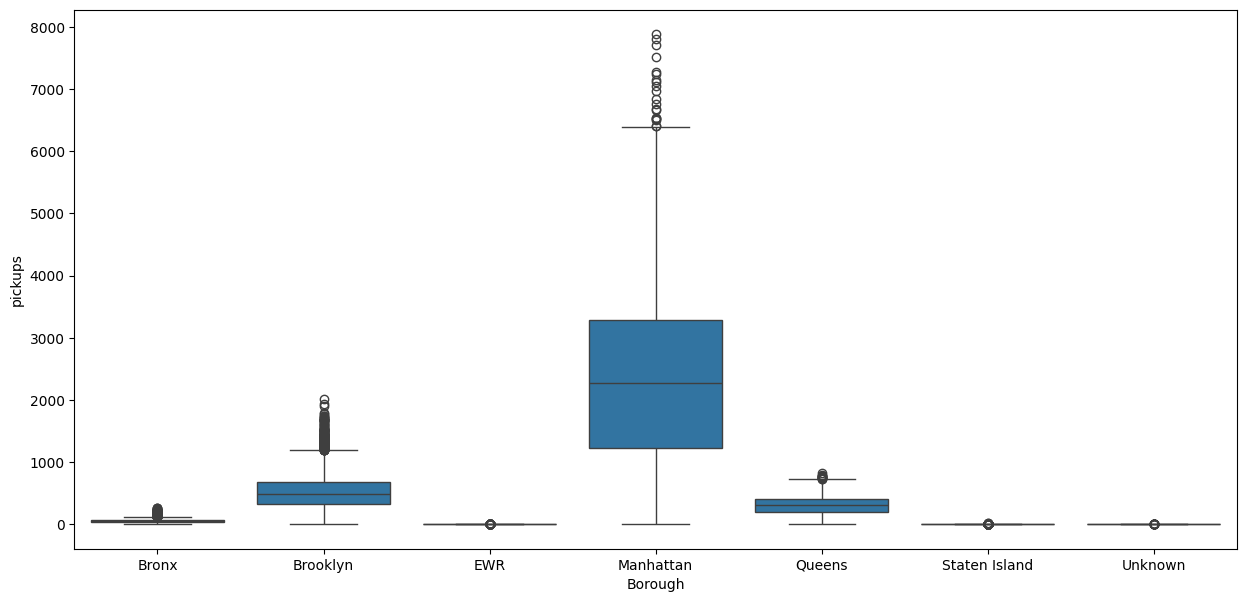

In [48]:
plt.figure(figsize=(15,7))
sns.boxplot(x=df['borough'], y=df['pickups'])
plt.ylabel('pickups')
plt.xlabel('Borough')
plt.show()

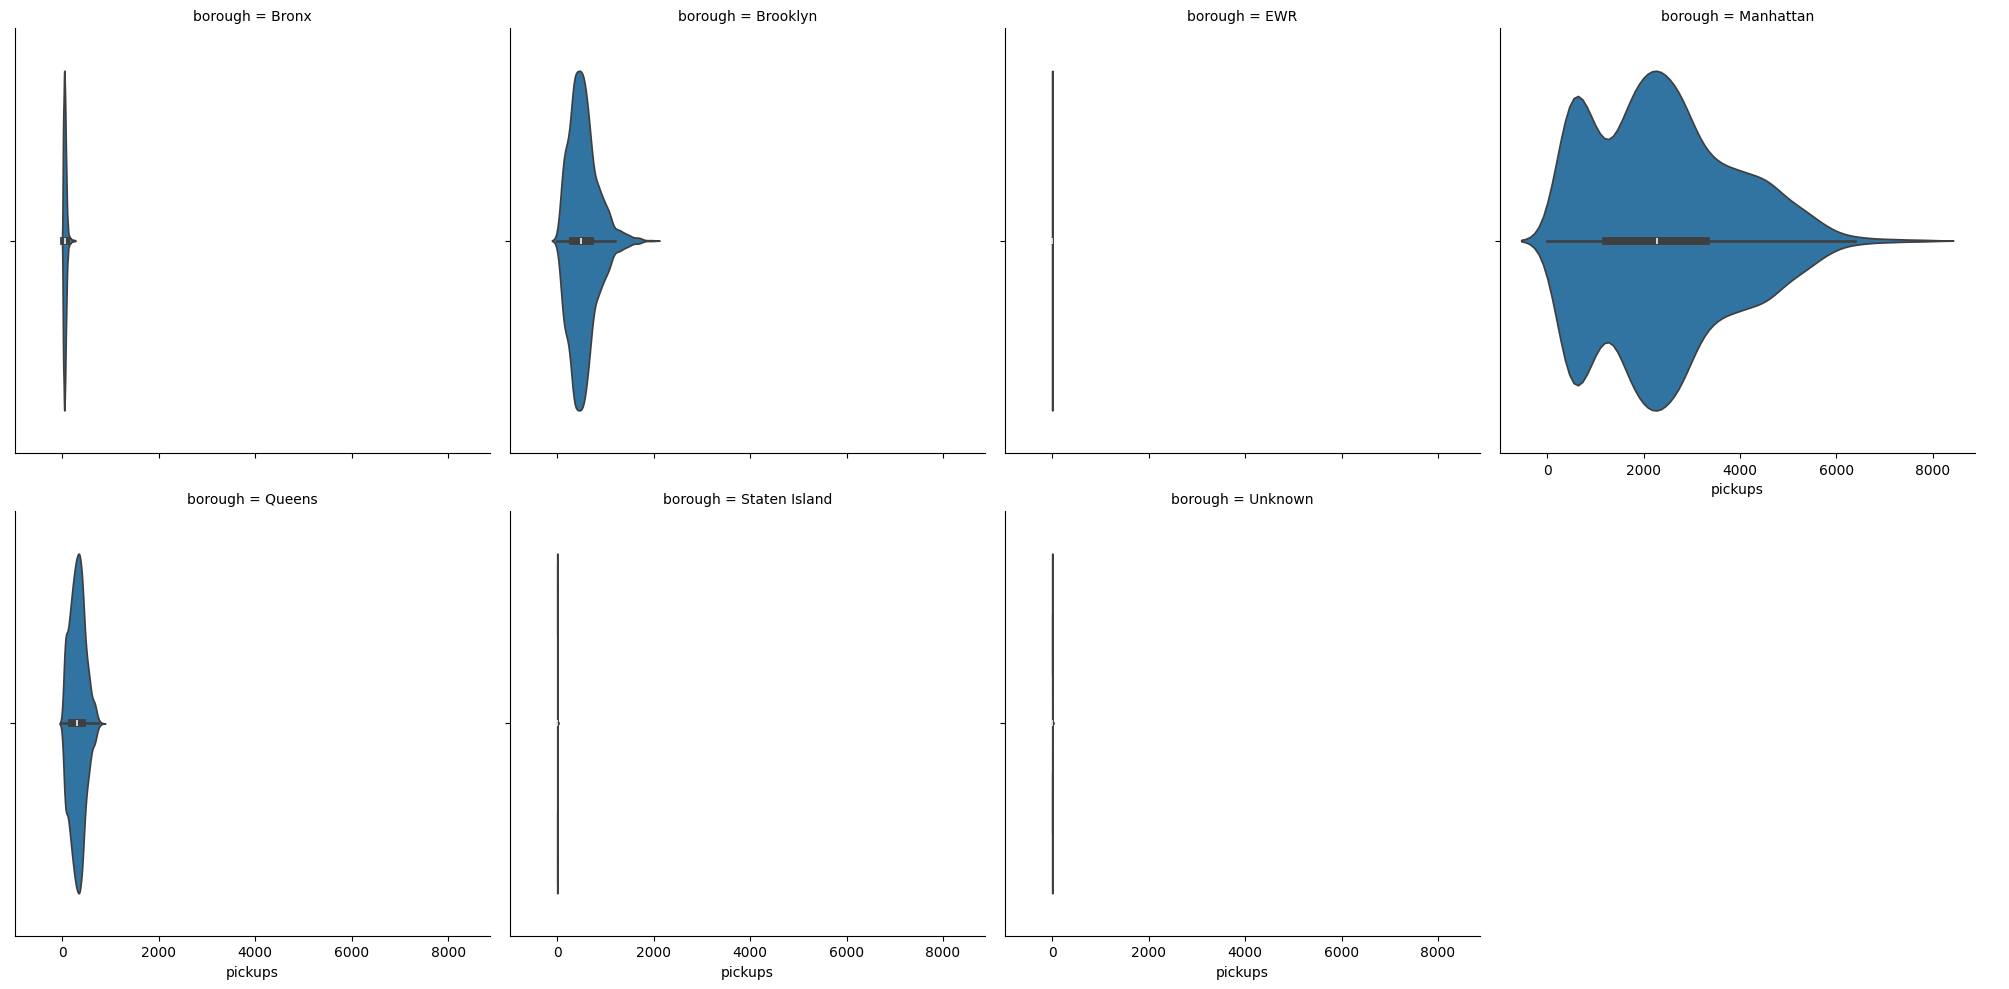

In [49]:
# Dispersion of pickups in every borough
sns.catplot(x='pickups', col='borough', data=df, col_wrap=4, kind="violin")
plt.show()

- *There is a clear difference in the number of riders across the different boroughs*
- *Manhattan has the highest number of bookings*
- *Brooklyn and Queens are distant followers*
- *EWR, Unknown and Staten Island have very low number of bookings. The demand is so small that probably it can be covered by the drop-offs of the inbound trips from other areas*

#### **Relationship between pickups and holidays**

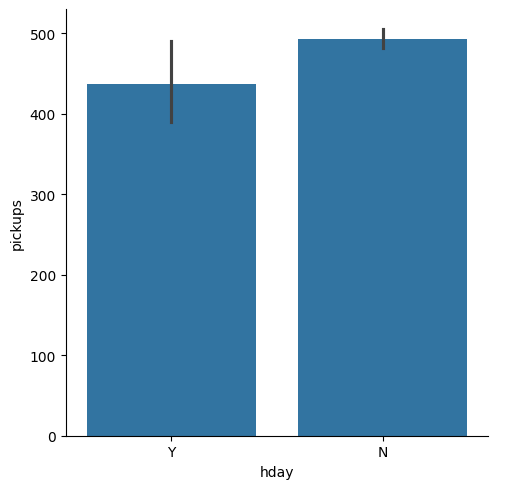

In [50]:
sns.catplot(x='hday', y='pickups', data=df, kind="bar")
plt.show()

- *The mean pickups on a holiday is lesser than that on a non-holiday*

### **Multivariate Analysis**

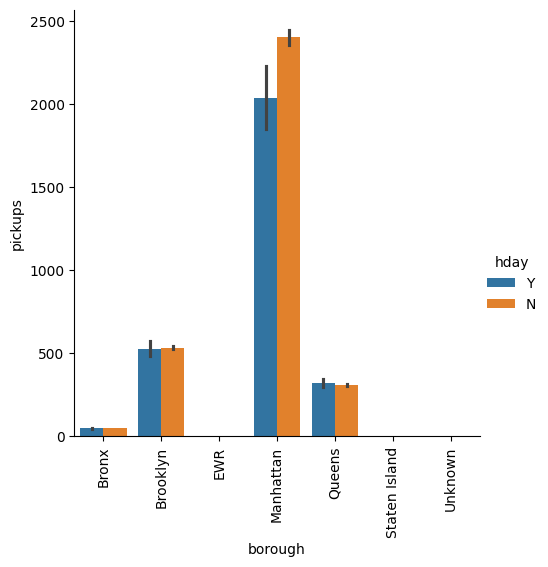

In [51]:
sns.catplot(x='borough', y='pickups', data=df, kind="bar", hue='hday')
plt.xticks(rotation=90)
plt.show()

The bars for EWR, Staten Island and Unknown are not visible. Let's check the mean pickups in all the borough to verify this.

In [52]:
# Check if the trend is similar across boroughs
df.groupby(by = ['borough','hday'])['pickups'].mean()

borough hday
Bronx N 50.771073
 Y 48.065868
Brooklyn N 534.727969
 Y 527.011976
EWR N 0.023467
 Y 0.041916
Manhattan N 2401.302921
 Y 2035.928144
Queens N 308.899904
 Y 320.730539
Staten Island N 1.606082
 Y 1.497006
Unknown N 2.057456
 Y 2.050420
Name: pickups, dtype: float64

- *In all the boroughs, except Manhattan, the mean pickups on a holiday is very similar to that on a non holiday*
- *In Queens, mean pickups on a holiday is higher*
- *There are hardly any pickups in EWR*

Since we have seen that borough has a significant effect on the number of pickups, let's check if that effect is present across different hours of the day.

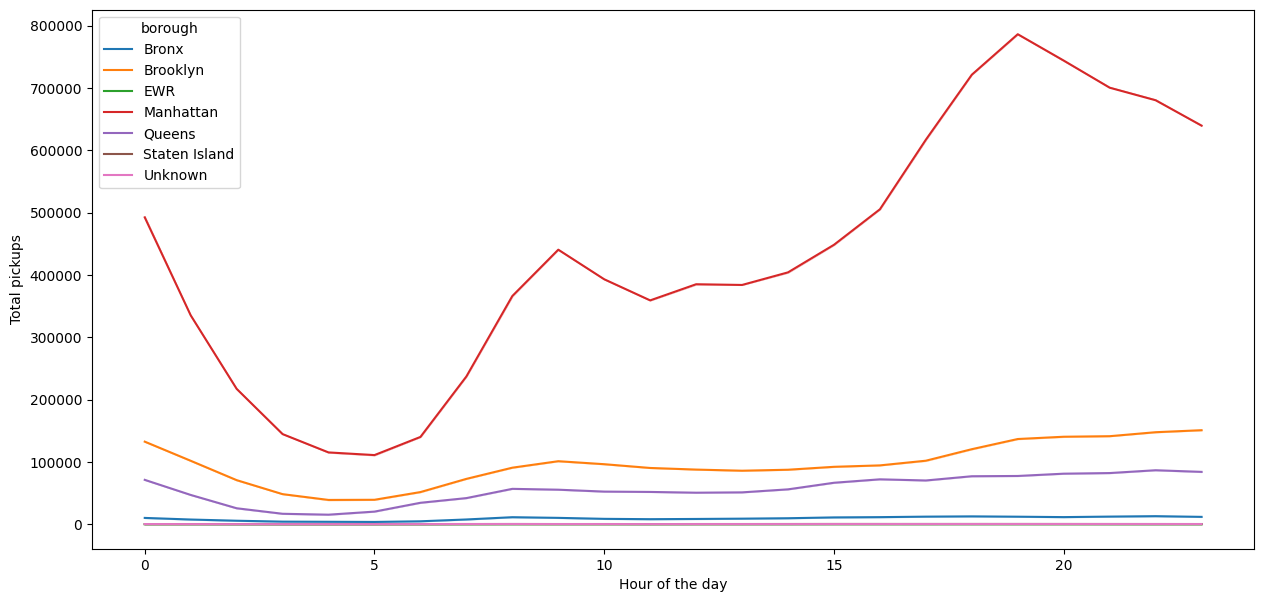

In [60]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="start_hour", y="pickups", hue='borough', estimator='sum', errorbar=('ci', False))
plt.ylabel('Total pickups')
plt.xlabel('Hour of the day')
plt.show()

- *The number of pickups in Manhattan is very high and dominant when we see the spread across boroughs*
- *The hourly trend which we have observed earlier can be mainly attributed to the borough Manhattan, as rest of the other boroughs do not show any significant change for the number of pickups on the hourly basis*

### **Outlier Detection and Treatment**

**Let's visualize all the outliers present in data together**

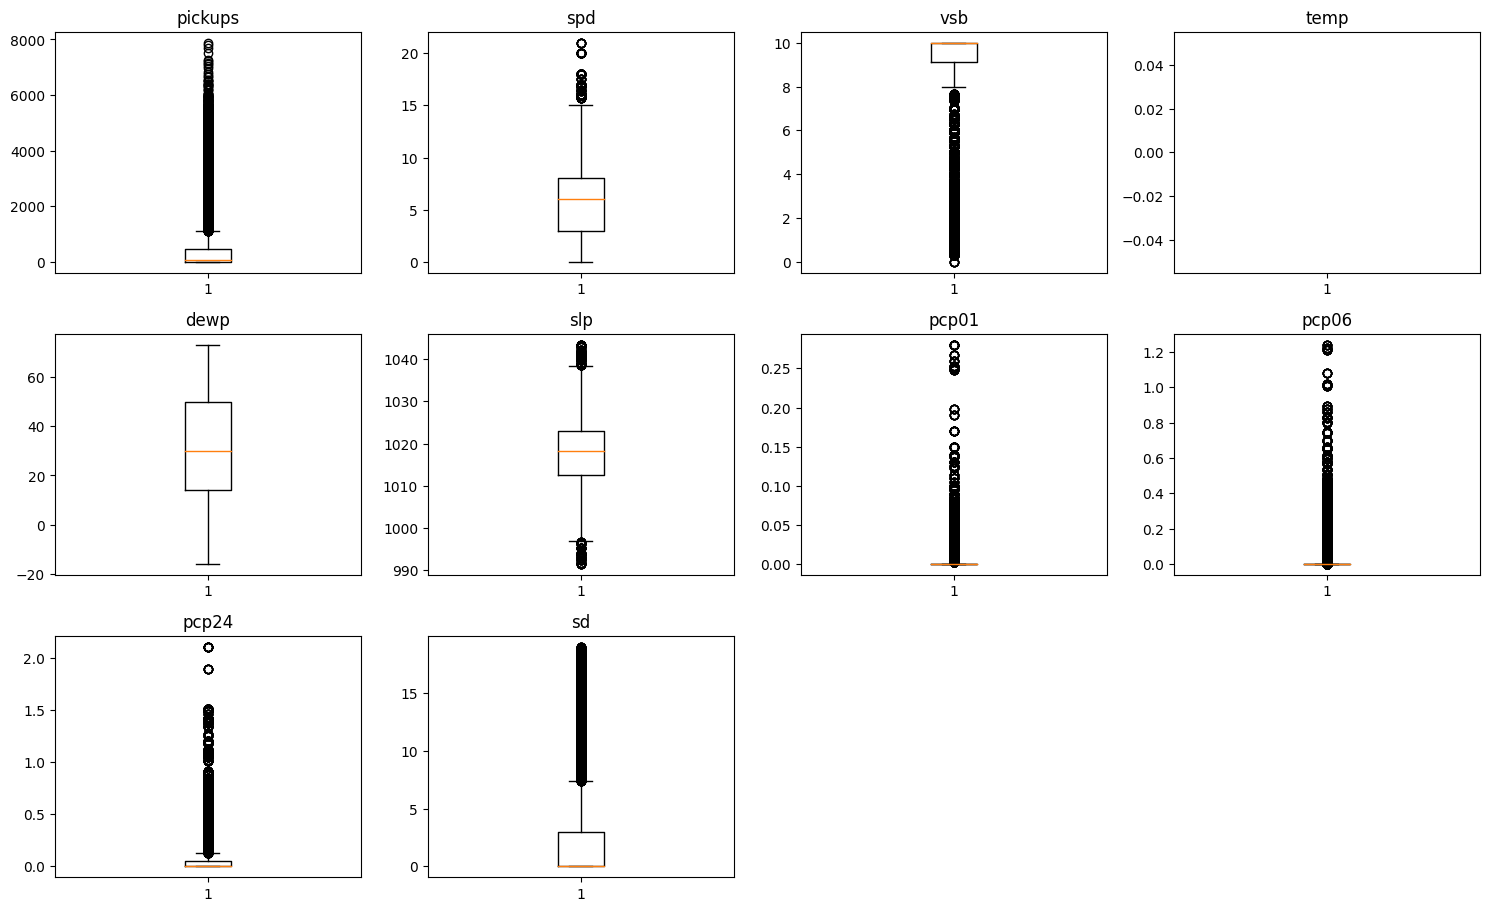

In [54]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list
numeric_columns = ['pickups','spd','vsb','temp','dewp', 'slp','pcp01', 'pcp06', 'pcp24', 'sd']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- *The `pickups` column has a wide range of values with lots of outliers. However we are not going to treat this column since the number of pickups can have a varying range and we can miss out on some genuine values if we treat this column*
- *Starting from `spd` to `sd`, all the columns are related to weather. The weather related variables have some outliers, however all of them seem to be genuine values. So we are not going to treat the outliers present in these columns*

### **Actionable Insights and Recommendations**

#### **Insights**

We analyzed a dataset of nearly 30K hourly Uber pickup informations, from New York boroughs.
The data spanned over every day of the first six months of the year 2015.
The main feature of interest here is the number of pickups.
Both from an environmental and business perspective, having cars roaming in an area while the demand is in another or filling the streets with cars during a low demand period while lacking during peak hours is inefficient. Thus we determined the factors that effect pickup and the nature of their effect.

We have been able to conclude that -  

1. Uber cabs are most popular in the Manhattan area of New York
2. Contrary to intuition, weather conditions do not have much impact on the number of Uber pickups
3. The demand for Uber has been increasing steadily over the months (Jan to June)
4. The rate of pickups is higher on the weekends as compared to weekdays
5. It is encouraging to see that New Yorkers trust Uber taxi services when they step out to enjoy their evenings
6. We can also conclude that people use Uber for regular office commutes.The demand steadily increases from 6 AM to 10 AM, then declines a little and starts picking up till midnight. The demand peaks at 7-8 PM
7. We need to further investigate the low demand for Uber on Mondays


#### **Recommendations to business**

1. Manhattan is the most mature market for Uber. Brooklyn, Queens, and Bronx show potential
2. There has been a gradual increase in Uber rides over the last few months and we need to keep up the momentum
3. The number of rides are high at peak office commute hours on weekdays and during late evenings on Saturdays. Cab availability must be ensured during these times
4. The demand for cabs is highest on Saturday nights. Cab availability must be ensured during this time of the week
5. Data should be procured for fleet size availability to get a better understanding of the demand-supply status and build a machine learning model to accurately predict pickups per hour, to optimize the cab fleet in respective areas
6. More data should be procured on price and a model can be built that can predict optimal pricing

####  **Further Analysis that can be done**

1. Dig deeper to explore the variation of cab demand, during working days and non-working days. You can combine Weekends+Holidays to be non-working days and weekdays to be the working days
2. Drop the boroughs that have negligible pickups and then analyze the data to uncover more insights